In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans, DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt
import math

<Axes: xlabel='x', ylabel='y'>

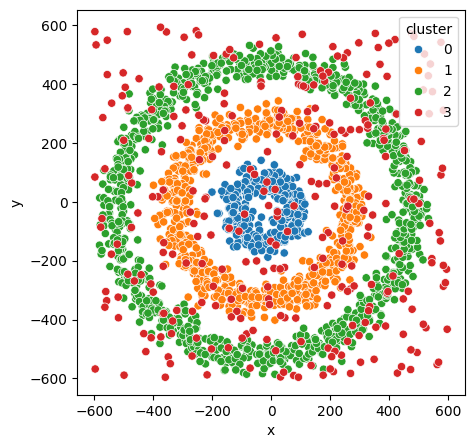

In [ ]:
def make_circle(r, n, noise = 30, seed = 1234):
    np.random.seed(seed)
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-noise,noise),math.sin(2*math.pi/n*x)*r+np.random.normal(-noise,noise)) for x in range(1,n+1)]

small_circle = make_circle(100, 300)
medium_circle = make_circle(300, 700)
big_circle = make_circle(500, 1000)
noise = [(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)]

def arrray_to_df(arr, i):
    df = pd.DataFrame(arr)
    df['cluster'] = str(i)
    return df

data = [arrray_to_df(arr, i) for i, arr in enumerate([small_circle, medium_circle, big_circle, noise])]
data = pd.concat(data)
data.columns = ['x', 'y', 'cluster']

plt.rcParams['figure.figsize'] = [5,5]
sns.scatterplot(data = data, x = 'x', y = 'y', hue = 'cluster')

In [4]:
def make_circle(r, n, noise = 30, seed = 1234):
    np.random.seed(seed)
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-noise,noise), math.sin(2*math.pi/n*x)*r+np.random.normal(-noise,noise)) for x in range(1,n+1)]

small_circle = make_circle(100, 300, 10)
medium_circle = make_circle(300, 700, 20)
big_circle = make_circle(500, 1000, 30)

noise = [(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)]

<Axes: xlabel='x', ylabel='y'>

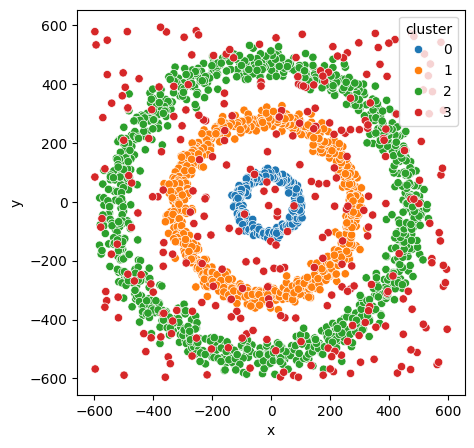

In [5]:
def arrray_to_df(arr, i):
    df = pd.DataFrame(arr)
    df['cluster'] = str(i)
    return df

data = [arrray_to_df(arr, i) for i, arr in enumerate([small_circle, medium_circle, big_circle, noise])]
data = pd.concat(data)
data.columns = ['x', 'y', 'cluster']

plt.rcParams['figure.figsize'] = [5,5]
sns.scatterplot(data = data, x = 'x',y = 'y',hue = 'cluster')

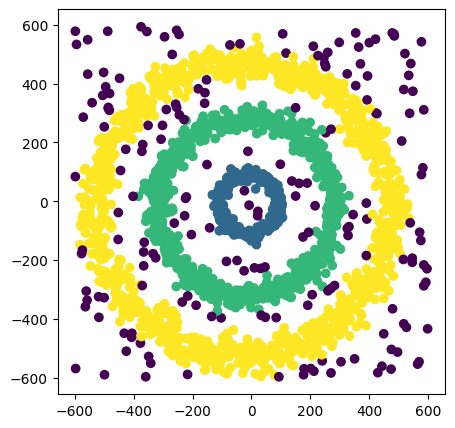

In [6]:
data['dbscan'] = DBSCAN(eps=32, min_samples=5).fit_predict(data[['x', 'y']])
plt.scatter( data['x'], data['y'], c=data['dbscan'] )

############################################
############# Smėlio dėžė ##################
############################################


 Bandau netinkamą klasterizacijos metodą: KMeans()


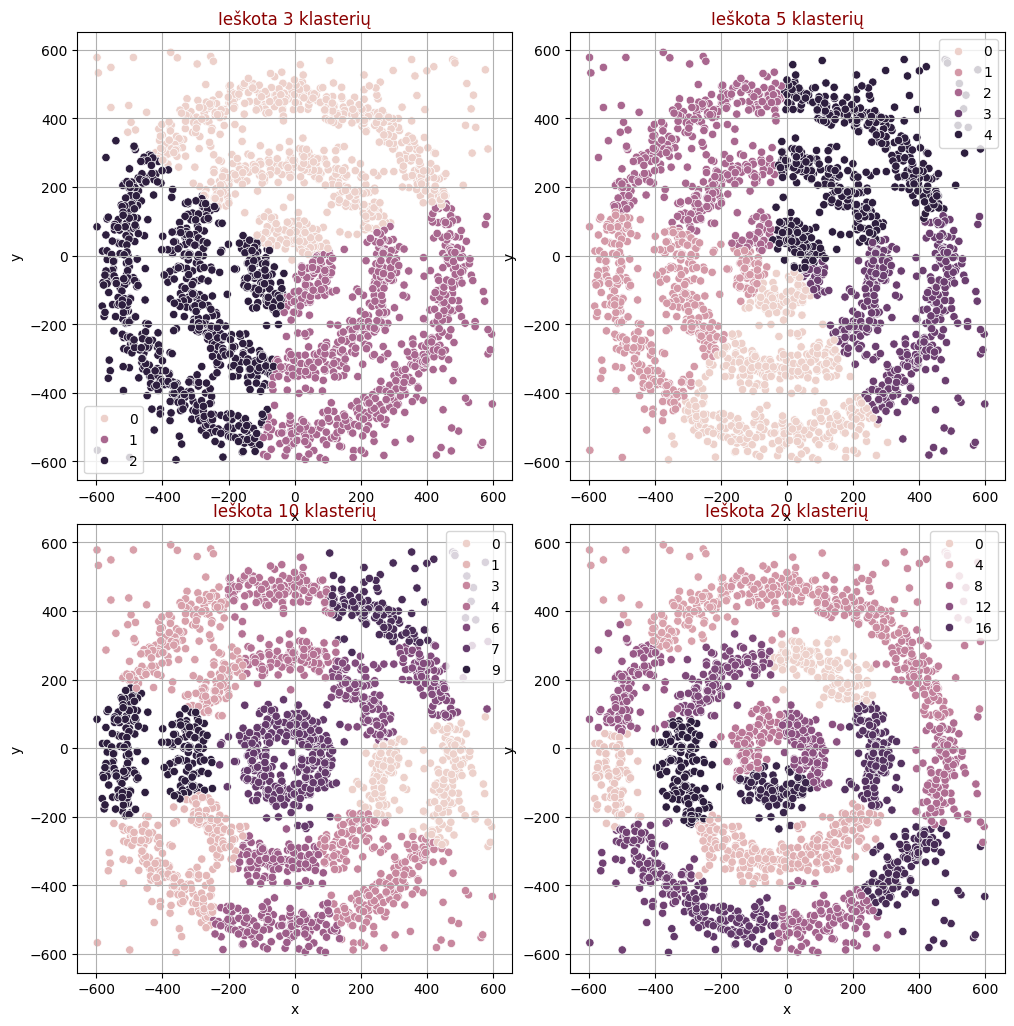

In [21]:
from sklearn.cluster import KMeans

print('\n Bandau netinkamą klasterizacijos metodą: KMeans()')

labels00=KMeans(n_clusters=3).fit_predict(data[['x', 'y']])
labels01=KMeans(n_clusters=5).fit_predict(data[['x', 'y']])
labels10=KMeans(n_clusters=10).fit_predict(data[['x', 'y']])
labels11=KMeans(n_clusters=20).fit_predict(data[['x', 'y']])

# fig, (ax1, ax2) = plt.subplots(2,gridspec_kw={'height_ratios':[1,1]},figsize=[3,6])
fig, axs = plt.subplots(2,2,gridspec_kw={'width_ratios':[1,1]},figsize=[10,10])
fig.tight_layout()

sns.scatterplot(x=data['x'], y=data['y'], hue=labels00, ax=axs[0,0])
axs[0,0].set_title(f"Ieškota 3 klasterių",color="darkred")
axs[0,0].grid(True)

sns.scatterplot(x=data['x'], y=data['y'], hue=labels01, ax=axs[0,1])
axs[0,1].set_title(f"Ieškota 5 klasterių",color="darkred")
axs[0,1].grid(True)

sns.scatterplot(x=data['x'], y=data['y'], hue=labels10, ax=axs[1,0])
axs[1,0].set_title(f"Ieškota 10 klasterių",color="darkred")
axs[1,0].grid(True)

sns.scatterplot(x=data['x'], y=data['y'], hue=labels11, ax=axs[1,1])
axs[1,1].set_title(f"Ieškota 20 klasterių",color="darkred")
axs[1,1].grid(True)

plt.show()